<a href="https://colab.research.google.com/github/LongNguyen1984/TimeSeriesWithPython/blob/main/gluocsePlot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reading data

In [10]:
from pandas import read_csv
file_path = 'glucoseMar24s.csv'
dataset = read_csv(file_path, header=0, sep=';',parse_dates=['TIME'],
                   index_col=['TIME'],)

In [22]:
dataset.head()

,DAY,UDT_CGMS,BG_LEVEL,CH_GR,BOLUS,REMARK
TIME,,,,,,
2021-03-24 00:02:00,24.03.2021,155,NaN,NaN,NaN,NaN
2021-03-24 00:07:00,24.03.2021,159,NaN,NaN,NaN,NaN
2021-03-24 00:12:00,24.03.2021,160,NaN,NaN,NaN,NaN
2021-03-24 00:17:00,24.03.2021,157,NaN,NaN,NaN,NaN
2021-03-24 00:22:00,24.03.2021,151,NaN,NaN,NaN,NaN


In [24]:
dataset['UDT_CGMS'][0]

155

In [21]:
dataset.describe  

<bound method NDFrame.describe of                             DAY  UDT_CGMS  BG_LEVEL  CH_GR  BOLUS  REMARK
TIME                                                                     
2021-03-24 00:02:00  24.03.2021       155       NaN    NaN    NaN     NaN
2021-03-24 00:07:00  24.03.2021       159       NaN    NaN    NaN     NaN
2021-03-24 00:12:00  24.03.2021       160       NaN    NaN    NaN     NaN
2021-03-24 00:17:00  24.03.2021       157       NaN    NaN    NaN     NaN
2021-03-24 00:22:00  24.03.2021       151       NaN    NaN    NaN     NaN
...                         ...       ...       ...    ...    ...     ...
2021-03-24 19:32:00  24.03.2021       121       NaN    NaN    NaN     NaN
2021-03-24 19:37:00  24.03.2021       134       NaN    NaN    NaN     NaN
2021-03-24 19:42:00  24.03.2021       137       NaN    NaN    NaN     NaN
2021-03-24 19:47:00  24.03.2021       131       NaN    NaN    NaN     NaN
2021-03-24 19:52:00  24.03.2021       123       NaN    NaN    NaN     NaN

[23

In [13]:
dataset['UDT_CGMS'].describe()

count    239.000000
mean     132.472803
std       16.174933
min      110.000000
25%      120.000000
50%      127.000000
75%      142.000000
max      175.000000
Name: UDT_CGMS, dtype: float64

In [29]:
len(dataset)

239

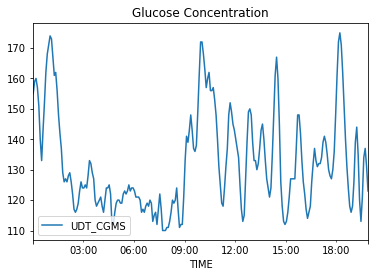

In [16]:
import matplotlib.pyplot as plt
dataset.plot(y='UDT_CGMS', title='Glucose Concentration')
plt.show()

###Function to find index in time series

In [46]:
def find_index(dataset, time):
   s = [index for index in range(len(dataset.index.values)) if str(dataset.index.values[index]) == time]
   return s[0]

In [47]:
x_start = find_index(dataset, '2021-03-24T17:12:00.000000000')
x_stop = find_index(dataset, '2021-03-24T18:57:00.000000000')

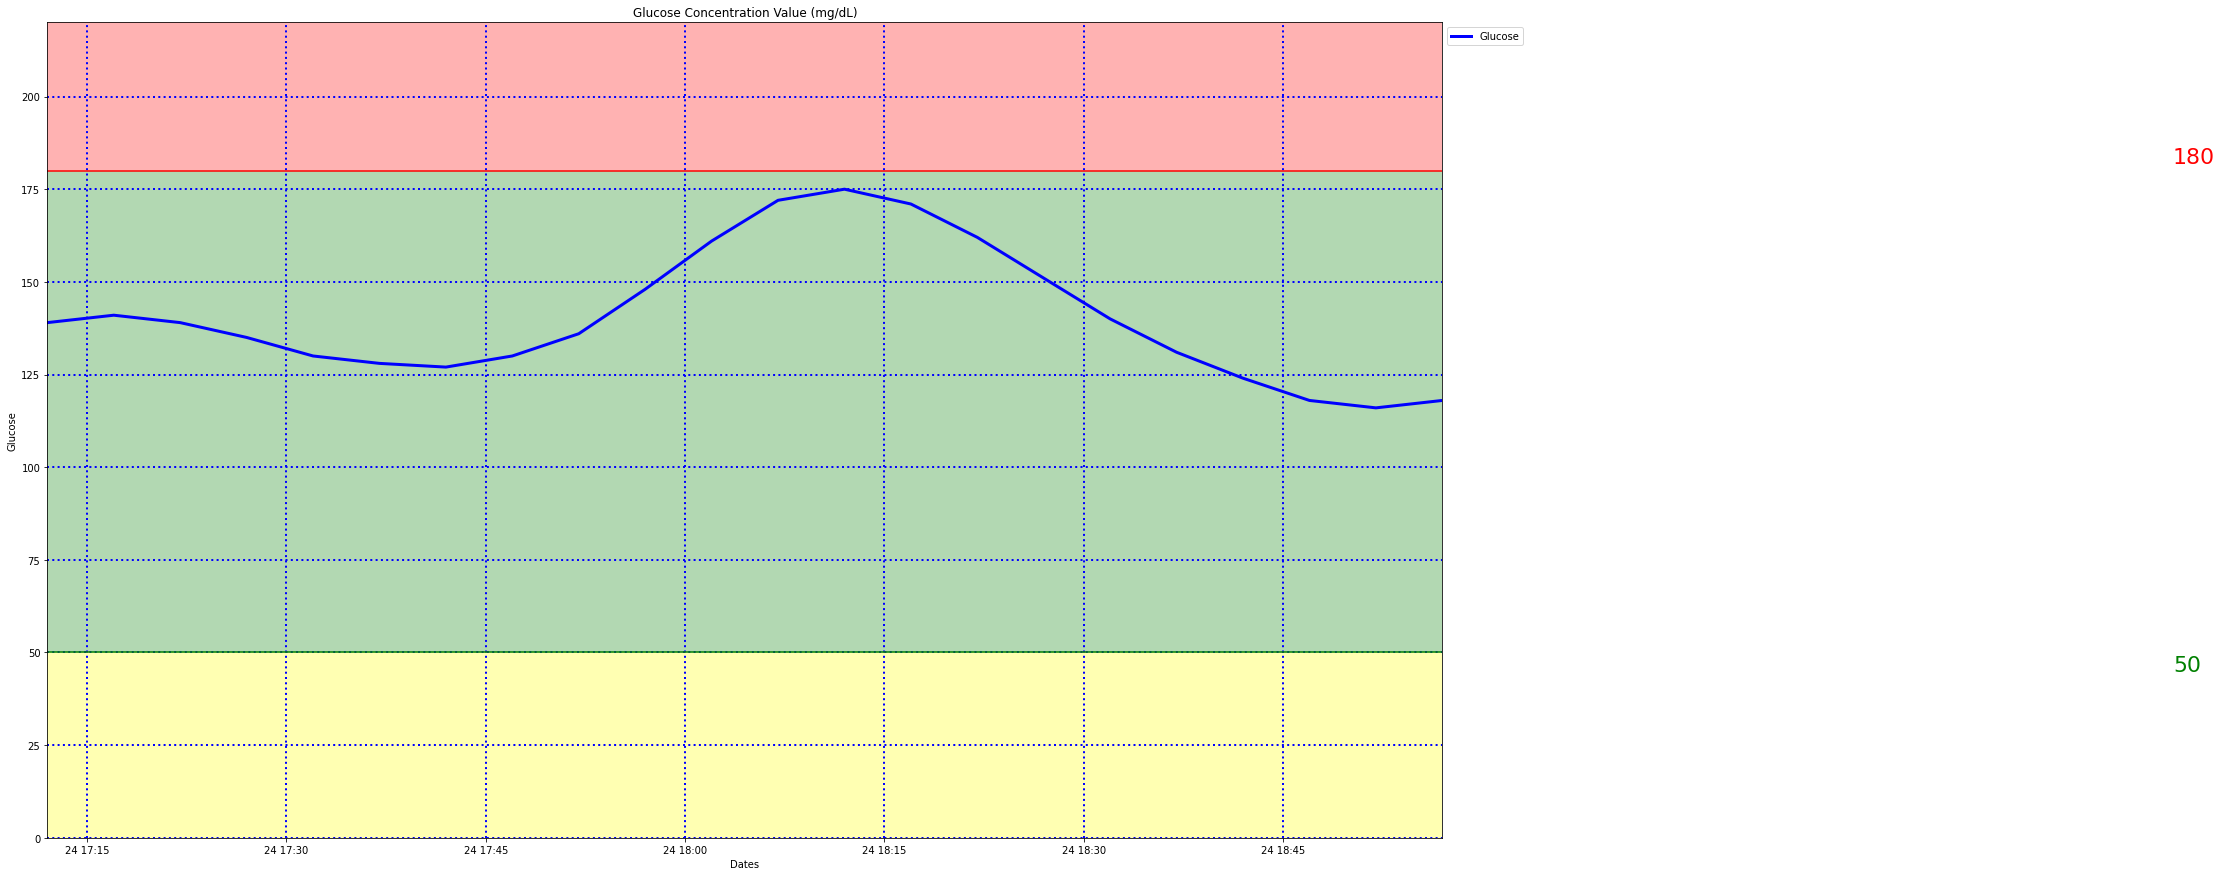

In [48]:
fig, ax = plt.subplots(1, figsize=(25,15))
plt.rc('grid', linestyle=':', color='b', linewidth=2)
ax.plot(dataset.index.values,
           dataset['UDT_CGMS'], 'b',linewidth=3)
ax.margins(0) # remove default margins (matplotlib verision 2+)
ax.axhline(y =50, color = 'green')
ax.axhline(y =180, color = 'red')
ax.axhspan(0, 50, facecolor='yellow', alpha=0.3)
ax.axhspan(50, 180, facecolor='green', alpha=0.3)
ax.axhspan(180, 220, facecolor='red', alpha=0.3)
#ax.grid(axis = 'x', axis='y')
ax.grid(True)

#ax.legend(["Glucose"]) 
ax.legend(["Glucose"], bbox_to_anchor = (1 , 1))
# Add title and axis names
plt.title('Glucose Concentration Value (mg/dL)')
plt.xlabel('Dates')
plt.ylabel('Glucose')
# Add number as a marker
plt.text(dataset.index.values[-1], 182, "180", color="red", fontsize=22)
plt.text(dataset.index.values[-1], 45, "50", color="green", fontsize=22)
#plt.yablel('Glucose Concentration Value (mg/dL)') 

plt.xlim([dataset.index.values[x_start], dataset.index.values[x_stop]])
plt.show()

In [34]:
dataset.index.values

array(['2021-03-24T00:02:00.000000000', '2021-03-24T00:07:00.000000000',
       '2021-03-24T00:12:00.000000000', '2021-03-24T00:17:00.000000000',
       '2021-03-24T00:22:00.000000000', '2021-03-24T00:27:00.000000000',
       '2021-03-24T00:32:00.000000000', '2021-03-24T00:37:00.000000000',
       '2021-03-24T00:42:00.000000000', '2021-03-24T00:47:00.000000000',
       '2021-03-24T00:52:00.000000000', '2021-03-24T00:57:00.000000000',
       '2021-03-24T01:02:00.000000000', '2021-03-24T01:07:00.000000000',
       '2021-03-24T01:12:00.000000000', '2021-03-24T01:17:00.000000000',
       '2021-03-24T01:22:00.000000000', '2021-03-24T01:27:00.000000000',
       '2021-03-24T01:32:00.000000000', '2021-03-24T01:37:00.000000000',
       '2021-03-24T01:42:00.000000000', '2021-03-24T01:47:00.000000000',
       '2021-03-24T01:52:00.000000000', '2021-03-24T01:57:00.000000000',
       '2021-03-24T02:02:00.000000000', '2021-03-24T02:07:00.000000000',
       '2021-03-24T02:12:00.000000000', '2021-03-24

In [45]:
find_index(dataset,'2021-03-24T19:47:00.000000000' )

237

In [36]:
len(dataset.index.values)

239